## Extracting all Images 

### Import all libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
%matplotlib inline

### The Dataset

#### MNIST Digit Recognition 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

https://www.kaggle.com/c/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

### Read the images and labels

In [34]:
data_file = '../../data/mnist.csv'

In [35]:
digits_df = pd.read_csv( data_file )

In [36]:
digits_df.head( 5 )

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For reading into numpy arrays

In [38]:
image_buffer = digits_df.iloc[:,1:].values
labels_np = digits_df['label'].values 

In [39]:
labels_np[0:5]

array([1, 0, 1, 4, 0])

In [40]:
image_buffer[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
image_buffer.shape

(42000, 784)

The images are 28 x 28 pixel images

### Verifying images

In [42]:
def print_image( idx ):
    plt.imshow( image_buffer[idx].reshape(28, 28));
    print( labels_np[idx] )

8


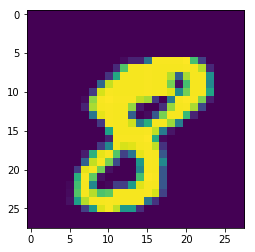

In [47]:
print_image( 10 )

### How images actually look like?

In [48]:
np.set_printoptions(precision=4, linewidth=120)

In [49]:
image_buffer[10].reshape(28, 28)[5:28, 5:25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7,  24,  24,  97, 253, 253, 253, 253, 255, 180,  48,   0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 186, 252, 252, 253, 252, 252, 252, 252, 253, 252, 227,  29,   0],
       [  0,   0,   0,   0,   0,  38, 155, 252, 252, 252, 253, 252, 252, 227,  79, 222, 252, 252, 129,   0],
       [  0,   0,   0,   0,  85, 233, 252, 252, 252, 252, 253, 252, 252, 202,  11, 180, 252, 252, 119,   0],
       [  0,   0,   0,  43, 240, 253, 252, 252, 252, 252, 253, 252, 252, 244, 126, 201, 252, 252, 150,   0],
       [  0,   0,   7, 212, 253, 255, 253, 253, 253, 232, 221,  42,   0, 104, 253, 255, 253, 205,  21,   0],
       [  0,   0,  25, 223, 252, 253, 252, 252, 214,  18,   0,   0,  34, 215, 252, 253, 223,  56,   0,   0],
       [  0,   0,   0,  99, 246, 253, 252, 252,  77,   0,   7,  70, 203, 252, 252, 173,  25,   0,   0,   0],
       [  0,   0,  

### Checking shape of the image file

In [50]:
image_buffer[0].shape

(784,)

### Reshaping all images

In [51]:
reshaped_images = np.array([x.reshape( 28, 28) for x in image_buffer])

In [52]:
reshaped_images.shape

(42000, 28, 28)

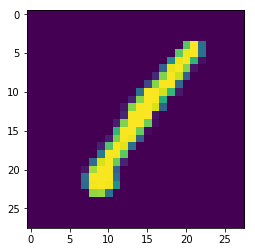

In [53]:
plt.imshow(reshaped_images[0]);

## Classifying Digits

### Importing all required libraries

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
import tensorflow as tf
import keras
from keras import backend as K

In [56]:
print(tf.__version__)
print(keras.__version__)

1.9.0
2.1.2


### Set X and Y

In [57]:
X = reshaped_images

In [58]:
y = keras.utils.to_categorical( labels_np )

In [59]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Splitting datasets into train and test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42 )

In [62]:
X_train.shape

(33600, 28, 28)

In [63]:
X_test.shape

(8400, 28, 28)

In [64]:
y_train.shape

(33600, 10)

In [65]:
y_test.shape

(8400, 10)

In [66]:
input_shape = X_train.shape[-2:]

In [67]:
print(input_shape)

(28, 28)


### Train a model

In [68]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

### Neural Networks Architecture 

- Layer
- Neurons
- Activation

## Model 1

In [70]:
model = Sequential()

model.add(Dense(64, input_shape=input_shape))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Flatten())

model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

### Explain number of parameters need to be trainined

- All the links (compute)

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 64)            1856      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)              0         
_________________________________________________________________
activation_5 (Activation)    (None, 1792)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                57376     
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
__________

### Loss Function

### Gradient Descent

- Learning Rate
- Optimizers

In [73]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### Training Model

- Epochs
- Batch Size

In [74]:
EPOCHS = 10
BATCH_SIZE = 128

In [75]:
%%time 
# fit model
history = model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.3,
    shuffle = True,
    verbose=1,
)

Train on 23520 samples, validate on 10080 samples
Epoch 1/10
23520/23520 [==============================] - 1s 48us/step - loss: 2.3595 - acc: 0.3404 - val_loss: 1.6755 - val_acc: 0.4255
Epoch 2/10
23520/23520 [==============================] - 1s 33us/step - loss: 1.5869 - acc: 0.4157 - val_loss: 1.5665 - val_acc: 0.4391
Epoch 3/10
23520/23520 [==============================] - 1s 33us/step - loss: 1.4411 - acc: 0.4701 - val_loss: 1.3726 - val_acc: 0.5442
Epoch 4/10
23520/23520 [==============================] - 1s 33us/step - loss: 1.1753 - acc: 0.5907 - val_loss: 1.0423 - val_acc: 0.6554
Epoch 5/10
23520/23520 [==============================] - 1s 33us/step - loss: 0.9346 - acc: 0.6863 - val_loss: 0.8979 - val_acc: 0.7069
Epoch 6/10
23520/23520 [==============================] - 1s 35us/step - loss: 0.8189 - acc: 0.7159 - val_loss: 0.9211 - val_acc: 0.6975
Epoch 7/10
23520/23520 [==============================] - 1s 34us/step - loss: 0.7474 - acc: 0.7291 - val_loss: 0.7972 - val_acc

In [76]:
# summarize history for accuracy

def plot_train_val_accuracy(hist):
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [77]:
# summarize history for loss

def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

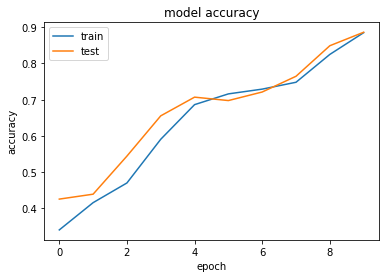

In [78]:
plot_train_val_accuracy(history.history)

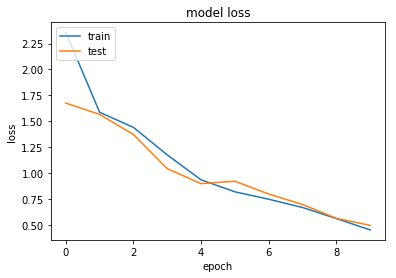

In [79]:
plot_train_val_loss(history.history)

### Predict and Evaluate

In [80]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

8400/8400 [==============================] - 0s 35us/step

Test accuracy:  0.8835714285714286


In [81]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)

### Verifying Predictions

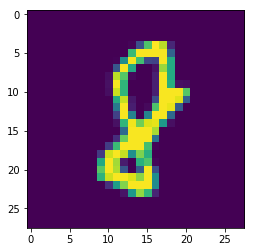

In [82]:
plt.imshow(X_test[0])

In [83]:
predictions[0]

8

In [84]:
len(X_test)

8400

### Randomly show a set of images and predictions

In [85]:
import random 

all_indexes = list(range(len(X_test)))
test_indexes = random.sample( all_indexes, 15 )

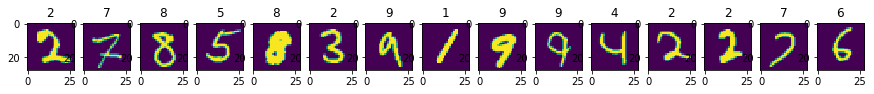

In [86]:
k = 1
plt.figure( figsize=(15, 6))
for i in test_indexes:
    plt.subplot(1, 15, k);
    plt.imshow(X_test[i])
    plt.title(str(predictions[i]))
    k = k + 1
plt.show()

### Confusion Matrix

In [87]:
np_label_list = list(np.unique(labels_np))

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
y_pred_classes = model.predict_classes(X_test)

In [90]:
y_actual_classes = np.argmax(y_test, axis=1)

In [91]:
y_pred_classes

array([8, 1, 9, ..., 2, 0, 9])

In [92]:
y_actual_classes

array([8, 1, 9, ..., 3, 0, 9])

In [93]:
confusion_matrix(y_pred_classes, y_actual_classes)

array([[784,   0,   0,   0,   1,   4,   6,   1,   1,   1],
       [  0, 870,   3,   1,   0,   1,   0,   1,   5,   1],
       [  0,   8, 751, 213,   0,   2,   0,   9,  10,   3],
       [  2,   5,  61, 580,   4,  18,   6,   9,  17,  10],
       [  1,   9,   3,   2, 799,   4,   8,   5,   8,  54],
       [  1,   1,   1,  13,   0, 605,  10,   3,   4,   2],
       [ 21,   3,  13,  92,  13,  57, 754,   5,  59,  19],
       [  3,   0,   7,  15,   1,   1,   0, 825,   2,  20],
       [  4,  11,   7,  18,   1,  10,   1,   1, 729,   3],
       [  0,   2,   0,   3,  20,   0,   0,  34,   0, 725]])

In [94]:
import seaborn as sn

In [100]:
def plot_confustion_matrix(y_test, y_pred):
    plt.figure(figsize=(10, 8))
    plt.title('Confusion matrix', fontsize=16)
    cm = confusion_matrix(y_test, y_pred, np_label_list)
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = np_label_list, 
               yticklabels = np_label_list )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.show()

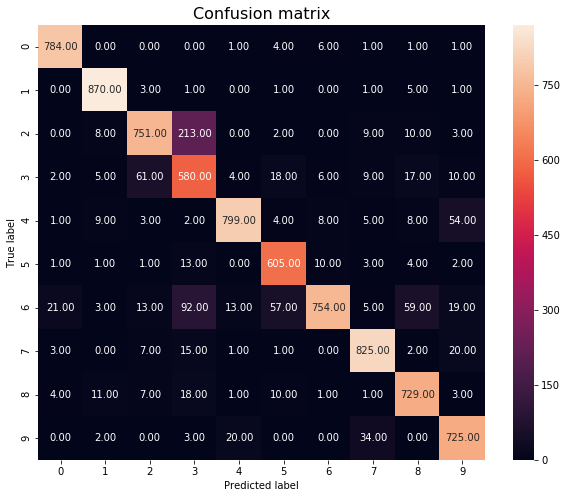

In [101]:
plot_confustion_matrix(y_pred_classes, y_actual_classes)

### Exercise: Build a deeper model

- Add one more layers with 128 neurons

# Convolution Neural Networks (CNN)
## What is Convolution?

Convolutions Demo:

- https://setosa.io/ev/image-kernels/

- https://ml4a.github.io/demos/convolution_all/


- Filter
- Kernel Size

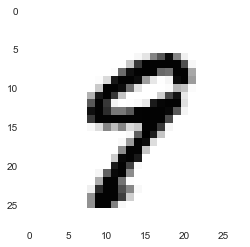

In [95]:
plt.grid(False)
plt.imshow( image_buffer[10].reshape(28, 28));

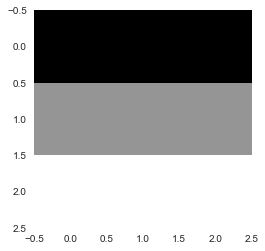

In [112]:
top=[[ 1, 1, 1],
     [ 0, 0, 0],     
     [ -1, -1, -1]]
plt.grid(False)
plt.imshow(top);

In [113]:
from scipy.ndimage.filters import correlate, convolve

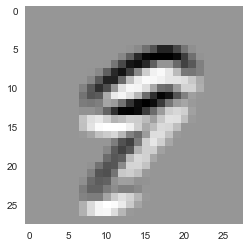

In [114]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   top)
plt.grid(False)
plt.imshow(convtop);

In [115]:
np.rot90(top, 1)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

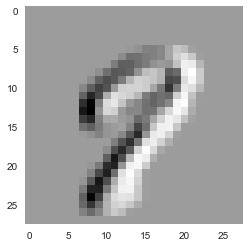

In [116]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   np.rot90(top, 1))
plt.grid(False)
plt.imshow(convtop);

## CNN Model

- Strides
- Padding
- MaxPooling

In [120]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU, regula

In [126]:
X_train_shape = X_train.shape
print(X_train_shape)

(33599, 28, 28)


In [127]:
X_test_shape = X_test.shape
print(X_test_shape)

(8400, 28, 28)


In [128]:
X_train_reshaped = X_train.reshape(X_train_shape[0],
                                   X_train_shape[1],
                                   X_train_shape[2], 1)

X_test_reshaped = X_test.reshape(X_test_shape[0],
                                 X_test_shape[1],
                                 X_test_shape[2], 1)

In [129]:
new_input_shape = (X_train_shape[1],X_train_shape[2], 1)

In [134]:
new_input_shape

(28, 28, 1)

## Model 2: 

input -> Conv2D -> Output -> Softmax

In [201]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model.add(Activation('relu'))
                            
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
    
model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [202]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                13530     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [203]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [204]:
%%time

history = model.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Train on 33599 samples, validate on 8400 samples
Epoch 1/10
33599/33599 [==============================] - 4s 114us/step - loss: 8.8098 - acc: 0.4466 - val_loss: 8.2490 - val_acc: 0.4849
Epoch 2/10
33599/33599 [==============================] - 4s 108us/step - loss: 8.2896 - acc: 0.4825 - val_loss: 8.2101 - val_acc: 0.4873
Epoch 3/10
33599/33599 [==============================] - 4s 108us/step - loss: 8.1851 - acc: 0.4900 - val_loss: 8.1370 - val_acc: 0.4932
Epoch 4/10
33599/33599 [==============================] - 4s 108us/step - loss: 6.7997 - acc: 0.5725 - val_loss: 5.3651 - val_acc: 0.6592
Epoch 5/10
33599/33599 [==============================] - 4s 109us/step - loss: 5.2505 - acc: 0.6675 - val_loss: 5.2421 - val_acc: 0.6680
Epoch 6/10
33599/33599 [==============================] - 4s 109us/step - loss: 3.9890 - acc: 0.7453 - val_loss: 3.4290 - val_acc: 0.7782
Epoch 7/10
33599/33599 [==============================] - 4s 112us/step - loss: 3.3590 - acc: 0.7845 - val_loss: 3.3817 - v

### Plotting Loss and Accuracy

In [217]:
def plot_accuracy(hist):
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()    

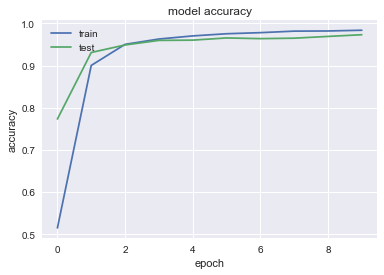

In [218]:
plot_accuracy(history.history)

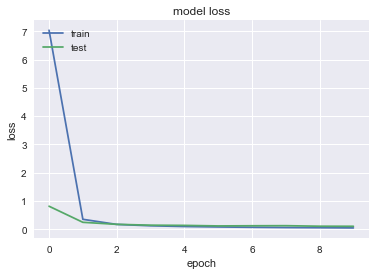

In [219]:
plot_loss(history.history)

### Model 2:

input -> Conv2D -> Dense(32) (Fully Conntected Layer) -> Dense(10) -> Softmax

In [221]:
K.clear_session()  # clear default graph

model2 = Sequential()
model2.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model2.add(Activation('relu'))
                            
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(32))    
model2.add(Activation('relu'))

model2.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model2.add(Activation('softmax'))

In [222]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                43296     
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
__________

In [223]:
model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [224]:
BATCH_SIZE = 64
EPOCHS = 10

In [225]:
%%time

history2 = model2.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Train on 33599 samples, validate on 8400 samples
Epoch 1/10
33599/33599 [==============================] - 4s 124us/step - loss: 6.1594 - acc: 0.6050 - val_loss: 5.1255 - val_acc: 0.6693
Epoch 2/10
33599/33599 [==============================] - 4s 115us/step - loss: 2.6141 - acc: 0.8058 - val_loss: 0.5145 - val_acc: 0.9115
Epoch 3/10
33599/33599 [==============================] - 4s 115us/step - loss: 0.2884 - acc: 0.9391 - val_loss: 0.2490 - val_acc: 0.9398
Epoch 4/10
33599/33599 [==============================] - 4s 116us/step - loss: 0.1428 - acc: 0.9636 - val_loss: 0.2002 - val_acc: 0.9502
Epoch 5/10
33599/33599 [==============================] - 4s 125us/step - loss: 0.0928 - acc: 0.9749 - val_loss: 0.1805 - val_acc: 0.9557
Epoch 6/10
33599/33599 [==============================] - 4s 127us/step - loss: 0.0664 - acc: 0.9827 - val_loss: 0.1755 - val_acc: 0.9593
Epoch 7/10
33599/33599 [==============================] - 4s 129us/step - loss: 0.0516 - acc: 0.9849 - val_loss: 0.1815 - v

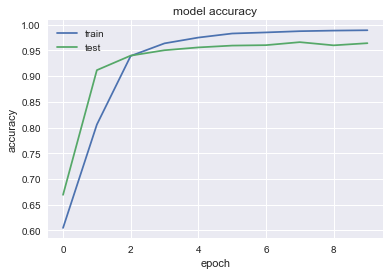

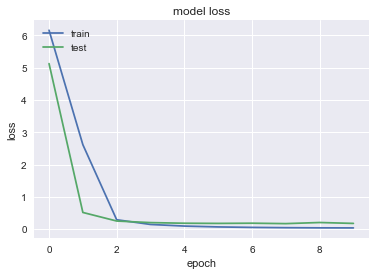

In [227]:
plot_accuracy(history2.history)

plot_loss(history2.history)

## Prediction on Test Images

In [234]:
predictions_2 = model2.predict_classes(X_test_reshaped)

predictions_2 = list(predictions_2)

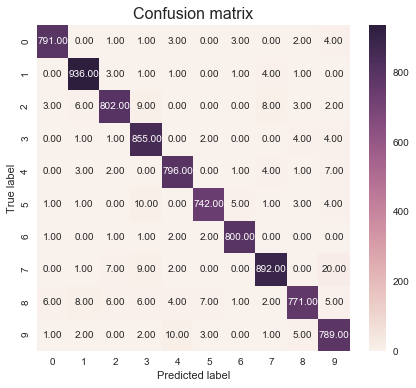

In [236]:
plot_confustion_matrix(predictions_2, 
                       y_actual_classes)

In [237]:
from sklearn import metrics

In [238]:
metrics.accuracy_score(predictions_3, 
                       y_actual_classes)

0.97309523809523812

### Which digits have gone wrong?

In [260]:
y_actual_classes_list = list(y_actual_classes) 

In [270]:
digit_indexes = [i for i, val in enumerate(y_actual_classes_list) if val == 5]

In [271]:
misclassfied_indexes = [i for i in digit_indexes if y_actual_classes_list[i] != predictions_3[i]]

In [272]:
misclassfied_indexes

[613,
 1720,
 2151,
 2430,
 3135,
 4386,
 5826,
 5987,
 6290,
 6819,
 6936,
 7468,
 7863,
 8343]

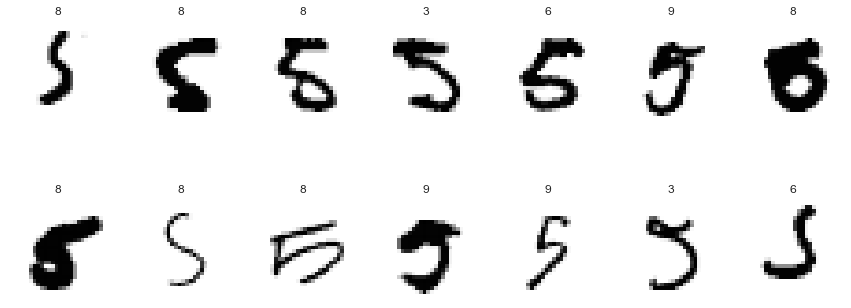

In [273]:
k = 1
plt.figure( figsize=(15, 6))
for i in misclassfied_indexes:
    plt.subplot(2, len(misclassfied_indexes)/2, k);
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(X_test[i])
    plt.title(str(predictions_3[i]) + str())
    k = k + 1
plt.show()

### Saving Model

In [274]:
model2.save('digits_model_2.h5')

In [275]:
!ls -al

total 936
drwxr-xr-x   7 manaranjan  staff     238 Apr 17 20:43 .
drwxr-xr-x  17 manaranjan  staff     578 Apr 17 15:58 ..
-rw-r--r--@  1 manaranjan  staff    6148 Mar 30 15:10 .DS_Store
drwxr-xr-x   3 manaranjan  staff     102 Mar 30 19:14 .ipynb_checkpoints
-rw-r--r--   1 manaranjan  staff  343561 Apr 17 16:25 MNIST Digit Classification.ipynb
-rw-r--r--   1 manaranjan  staff  125080 Apr 17 20:43 digits_model_3.h5
drwxr-xr-x   2 manaranjan  staff      68 Mar 30 15:20 mnist


## Load model and make prediction

In [308]:
from keras.models import load_model

new_model = load_model('digits_model_2.h5')

In [309]:
predictions_new = new_model.predict_classes(X_test_reshaped)

In [310]:
predictions_new[0:10]

array([6, 1, 5, 3, 1, 4, 0, 9, 6, 0])